In [ ]:
import cv2 as cv
import numpy as np
import skimage
import matplotlib.pyplot as plt
import os
import pandas as pd
%matplotlib inline

In [2]:
img = cv.imread('image/mac.jpg')
print(img.shape)

(4000, 2927, 3)


Invalid SOS parameters for sequential JPEG


In [3]:
img_re = cv.resize(img,dsize=(0,0), fx = 0.2, fy =0.2)
print(img_re.shape)

(800, 585, 3)


In [4]:
img_re1 = cv.resize(img,dsize=(400,400))
print(img_re1.shape)

(400, 400, 3)


In [5]:
gray = cv.cvtColor(img_re1, cv.COLOR_BGR2GRAY)
canny = cv.Canny(gray,200,200)

contour, hierarchy = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
lcontour = []
for i in range(len(contour)):
    if contour[i].shape[0] > 100:
        lcontour.append(contour[i])

white = np.ones((400,400,3)) * 255
cv.drawContours(white,contour,-1,(0,0,0),3)
print(img.shape, gray.shape, canny.shape)

(4000, 2927, 3) (400, 400) (400, 400)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


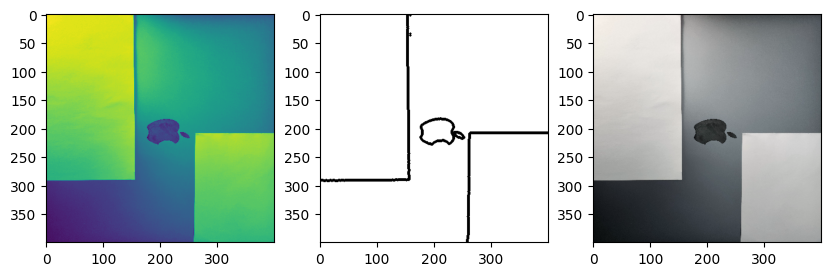

In [6]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(10,5))
axs[0].imshow(gray)
axs[1].imshow(white)
axs[2].imshow(img_re1)


In [7]:
img_list = os.listdir('image/')

In [8]:
address = []

for i in range(len(img_list)):
    ad = os.path.join('image/', img_list[i])
    address.append(ad)

In [9]:
for i in range(len(address)):
    img = cv.imread(address[i])
    img = cv.resize(img, dsize=(128,128))
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    canny = cv.Canny(gray,200,200)
    
    contour, _ = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
    white = np.ones((128,128,3),np.float32) * 255.0
    cv.drawContours(white,contour,-1,(0,0,0),2)
    
    img = (img / 127.5) -1
    gray = (gray / 127.5) -1
    white = (white / 127.5) -1
    
    img = np.expand_dims(img, axis = 0)
    gray = np.expand_dims(gray, axis = 0)
    white = np.expand_dims(white, axis = 0)
    
    if i == 0:
        np_real = img
        np_gray = gray
        np_white = white
    else:
        np_real = np.vstack((np_real,img))
        np_gray = np.vstack((np_gray,gray))
        np_white = np.vstack((np_white,white))
        

    

Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Invalid SOS

In [10]:
print(np_real.shape, np_gray.shape, np_white.shape)

(52, 128, 128, 3) (52, 128, 128) (52, 128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


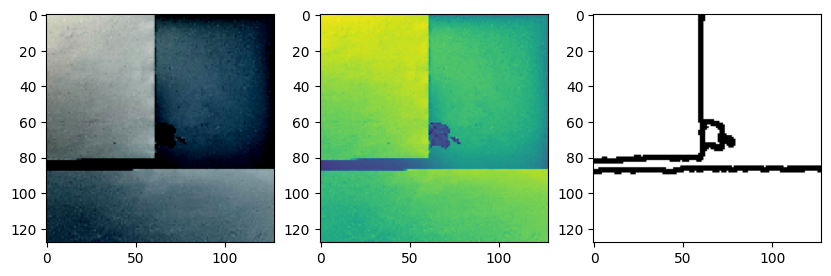

In [11]:
fig , axs = plt.subplots(figsize=(10,5), nrows = 1, ncols = 3)
axs[0].imshow(np_real[0])
axs[1].imshow(np_gray[0])
axs[2].imshow(np_white[0])

In [12]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LeakyReLU, Conv2D, Conv2DTranspose, UpSampling2D, Input, Concatenate
from tensorflow_addons.layers import InstanceNormalization
from tensorflow.keras.optimizers import Adam

In [13]:
# Generator
def build_generator():
    input_tensor = Input(shape=(128,128,3))
    ### Donwsampling
    # 64 * 64 * 32
    d1 = Conv2D(32,kernel_size = 4, strides = 2, padding = 'same')(input_tensor)
    d1 = LeakyReLU(alpha = 0.2)(d1)
    d1 = InstanceNormalization()(d1)
    # 32 * 32 * 64
    d2 = Conv2D(64,kernel_size = 4, strides = 2, padding = 'same')(d1)
    d2 = LeakyReLU(alpha = 0.2)(d2)
    d2 = InstanceNormalization()(d2)
    
    # 16 * 16 * 128
    d3 = Conv2D(128,kernel_size = 4, strides = 2, padding = 'same')(d2)
    d3 = LeakyReLU(alpha = 0.2)(d3)
    d3 = InstanceNormalization()(d3)
    
    # 8 * 8 * 256
    d4 = Conv2D(256,kernel_size = 4, strides = 2, padding = 'same')(d3)
    d4 = LeakyReLU(alpha = 0.2)(d4)
    d4 = InstanceNormalization()(d4)
    
    
    ### Upsampling
    #
    u1 = UpSampling2D(size=2)(d4)
    u1 = Conv2D(128, kernel_size = 4, strides = 1, padding= 'same',activation = 'relu')(u1)
    u1 = InstanceNormalization()(u1)
    u1 = Concatenate()([u1,d3])
    
    u2 = UpSampling2D(size=2)(u1)
    u2 = Conv2D(64, kernel_size = 4, strides = 1, padding= 'same',activation = 'relu')(u2)
    u2 = InstanceNormalization()(u2)
    u2 = Concatenate()([u2,d2])
    
    u3 = UpSampling2D(size=2)(u2)
    u3 = Conv2D(32, kernel_size = 4, strides = 1, padding= 'same',activation = 'relu')(u3)
    u3 = InstanceNormalization()(u3)
    u3 = Concatenate()([u3,d1])
    
    u4 = UpSampling2D(size=2)(u3)
    output = Conv2D(3, kernel_size =4, strides =1, padding = 'same',activation = 'tanh')(u4)
    
    model = Model(input_tensor, output)
    return model

In [14]:
def build_discriminator():
    input_tensor = Input(shape=(128,128,3))
    # 64, 64, 64 
    x0 = Conv2D(64,kernel_size = 4, strides = 2, padding = 'same')(input_tensor)
    x0 = LeakyReLU(alpha = 0.2)(x0)

    # 32, 32, 128
    x1 = Conv2D(128,kernel_size = 4, strides = 2, padding = 'same')(x0)
    x1 = LeakyReLU(alpha = 0.2)(x1)
    x1 = InstanceNormalization()(x1)
    
    # 16, 16, 256
    x2 = Conv2D(256,kernel_size = 4, strides = 2, padding = 'same')(x1)
    x2 = LeakyReLU(alpha = 0.2)(x2)
    x2 = InstanceNormalization()(x2)    
    
    # 8, 8, 512
    x3 = Conv2D(512,kernel_size = 4, strides = 2, padding = 'same')(x2)
    x3 = LeakyReLU(alpha = 0.2)(x3)
    x3 = InstanceNormalization()(x3)    

    
    output = Conv2D(1, kernel_size = 4, strides = 1, padding='same')(x3)
    
    model = Model(input_tensor, output)
    return model

In [15]:
optimizer = Adam(0.0002, 0.5)
# patch = int(512/ 2**4)
# disc_patch = (16, 16, 1)
lambda_cycle = 10.0
lambda_id = 0.9 * lambda_cycle

In [16]:
g_ab = build_generator()
g_ba = build_generator()
d_a = build_discriminator()
d_b = build_discriminator()

d_a.compile(loss= 'mse', optimizer = optimizer, metrics = 'accuracy')
d_b.compile(loss= 'mse', optimizer = optimizer, metrics = 'accuracy')

Metal device set to: Apple M1


2023-03-20 14:49:54.742977: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-20 14:49:54.743109: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
input_shape = (128,128,3)

img_a = Input(shape=input_shape)
img_b = Input(shape=input_shape)

fake_b = g_ab(img_a)
fake_a = g_ba(img_b)
reconstr_a = g_ba(fake_b)
reconstr_b = g_ab(fake_a)
img_a_id = g_ba(img_a)
img_b_id = g_ab(img_b)

In [18]:
d_a.trainable = False
d_b.trainable = False

valid_a = d_a(fake_a)
valid_b = d_b(fake_b)

In [19]:
img_gan = Model([img_a, img_b], [valid_a, valid_b,reconstr_a,reconstr_b, img_a_id, img_b_id])
img_gan.compile(loss = ['mse','mse','mae','mae','mae','mae'], loss_weights = [1,1,lambda_cycle, lambda_cycle, lambda_id, lambda_id],
               optimizer = optimizer)

In [ ]:
# g1 = build_generator()
# d1 = build_discriminator()
# img_gan = build_img_gan(g1,d1)

# d1.compile(loss='binary_crossentropy', optimizer = optimizer)
# d1.trainable = False
# img_gan.compile(loss = 'binary_crossentropy', optimizer = optimizer)

In [ ]:
# def show_img(epoch, batch_size):
#     idx = np.random.randint(0,np_white.shape[0], batch_size)
#     input_batch = np_white[idx]
#     gen_img = g_ab.predict(input_batch)
    
#     for i in range(gen_img.shape[0]):
#         plt.subplot(1,batch_size+2,i+1)
#         plt.imshow(np_real[idx], interpolation = 'nearest')
#         plt.imshow(np_white[idx], interpolation = 'nearest')
#         plt.imshow(gen_img[i], interpolation = 'nearest')
#         plt.axis('off')
#     plt.tight_layout()
#     plt.savefig('test/cycle_gen_img %d.png' %epoch)

In [20]:
def show_img(epoch, batch_size):
    idx = np.random.randint(0,np_white.shape[0], batch_size)
    input_batch = np_white[idx]
    gen_img = g_ab.predict(input_batch)

    fig, axs = plt.subplots(figsize = (9,3), nrows = 1 , ncols = 2)
    axs[0].imshow(np_real[idx][0])
    axs[1].imshow(gen_img[0])
    
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('test/cycle_gen_img %d.png' %epoch)

In [21]:
def train(epochs, batch_size):
    valid = np.ones((batch_size,))
    fake = np.zeros((batch_size,))
    
    for epoch in range(epochs):
        idx = np.random.randint(0,np_white.shape[0], batch_size)

        img_a = np_white[idx] # img_a
        img_b = np_real[idx] # img_b
        
        fake_b = g_ab.predict(img_a)
        fake_a = g_ba.predict(img_b)
        
        d_a_loss_real = d_a.train_on_batch(img_a, valid)
        d_a_loss_fake = d_a.train_on_batch(fake_a, fake)
        d_a_loss = 0.5 * np.add(d_a_loss_real, d_a_loss_fake)
        
        d_b_loss_real = d_b.train_on_batch(img_b, valid)
        d_b_loss_fake = d_b.train_on_batch(fake_b, fake)
        d_b_loss = 0.5 * np.add(d_b_loss_real, d_b_loss_fake)
        
        d_loss = 0.5 * np.add(d_a_loss, d_b_loss)
        
        g_loss = img_gan.train_on_batch([img_a, img_b],
                                       [valid,valid,img_a,img_b,img_a,img_b])

        
        if epoch == 0 or epoch%1000 ==0:
            show_img(epoch, batch_size)
            img_gan.save_weights('test/my_checkpoint')
        

In [22]:
img_gan.load_weights('test/my_checkpoint')

In [ ]:
# Data 정규화 했고, pix2pix 보고 upsampling 등 바꿔볼 것
# Save parameter 해볼 것
# Call back은 Mackbook으로 실험
train(50001,1)

In [ ]:
# idxs = [x for x in range(np_real.shape[0])]
# fig, axs = plt.subplots(figsize=(6,60), nrows = np_real.shape[0], ncols = 2)
# imgs = g_ab.predict(np_real[idxs])
# for idx in range(np_real.shape[0]):
#     axs[idx,0].imshow(np_real[idx])
#     axs[idx,1].imshow(imgs[idx])
# plt.axis('off')
# plt.savefig('test/cycle_gen_img.png')

In [ ]:
print(np_real[0].shape, imgs[0].shape)

2/2 [==============================] - 0s 129ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


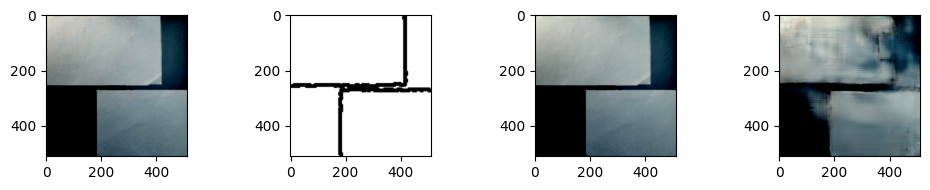

In [37]:
fig, axs = plt.subplots(figsize=(10,2),nrows = 1, ncols = 4)
idxs = [x for x in range(np_real.shape[0])]
imgs = g_ab.predict(np_real[idxs])
i = 1
img_real = cv.resize(np_real[i],dsize=(512,512))
img_gen = cv.resize(imgs[i],dsize=(512,512))
img_white = cv.resize(np_white[i],dsize=(512,512))
img_other = cv.resize(new_img[0], dsize=(512,512))

axs[0].imshow(img_real)
axs[1].imshow(img_white)
axs[2].imshow(img_gen)
axs[3].imshow(img_other)
plt.tight_layout()

In [ ]:
blue_layer = pd.DataFrame(img_white[:,:,0])
green_layer = pd.DataFrame(img_white[:,:,1])
red_layer = pd.DataFrame(img_white[:,:,2])

In [ ]:
# blue_layer.to_csv('layer_blue.csv',sep = ',', na_rep = 'NaN')
# green_layer.to_csv('layer_green.csv',sep = ',', na_rep = 'NaN')
# red_layer.to_csv('layer_red.csv',sep = ',', na_rep = 'NaN')

In [ ]:
plt.imshow(img_white)
plt.axis('off')
plt.savefig('drawing.jpg',bbox_inches='tight')

In [38]:
new = cv.imread('drawing.jpg')
new.shape

(389, 389, 3)

In [39]:
new = cv.resize(new, dsize=(128,128))
print(new.shape)
new = np.expand_dims(new, axis=0)
print(new.shape)

(128, 128, 3)
(1, 128, 128, 3)


In [40]:
new_img = g_ab.predict(new)

1/1 [==============================] - 0s 32ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


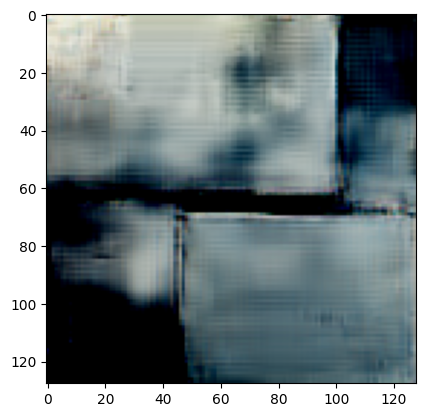

In [41]:
plt.imshow(new_img[0,:,:,:])

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [ ]:
axs, fig = plt.subplots(nrows = 1, ncols = 3, figsize = (9,3))
print(type(axs))

In [ ]:
np_real[0].shape